# 1) Import Necessary Libraries

In [1]:
#data analysis libraries
import numpy as np
import pandas as pd

#data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#If we use %matplotlib inline, it will affix the visualization.Hence If we share the code notebook, the visualization will be there without executing it

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


# 2) Read in and explore the data

In [2]:
#import train and test csv files

train= pd.read_csv("train.csv")
test=pd.read_csv("test.csv") 



In [3]:
#Let's take a look at our training data to get an idea of variables
#We will use Pandas head() method to return top n (5 by default) rows of a data frame or series.

print("The data set has {} rows and {} columns".format(train.shape[0],train.shape[1]))
train.head()


The data set has 891 rows and 12 columns


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Now we view some basic statistical details of our dataframe like mean,std etc
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [5]:
#We use info() method to see more information of our train dataset.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Now we check for the missing values
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#Now we look into the test dataset
print("The data set has {} rows and {} columns".format(test.shape[0],test.shape[1]))
test.head()

The data set has 418 rows and 11 columns


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

 # 3) Data Analysis

In [9]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train)*100.0))
print ("Total: %i"%len(train))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


# Pclass VS Survival

In [10]:
train.Pclass.value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
train.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

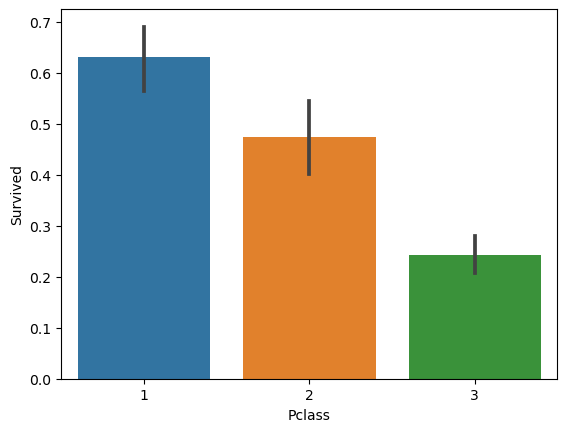

In [13]:
#Draw a bar plot of survival by Pclass category

sns.barplot(x="Pclass",y="Survived",data=train)


People with higher socioeconomic class have a higher rate of survival.

# Sex VS Survival

In [14]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [16]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

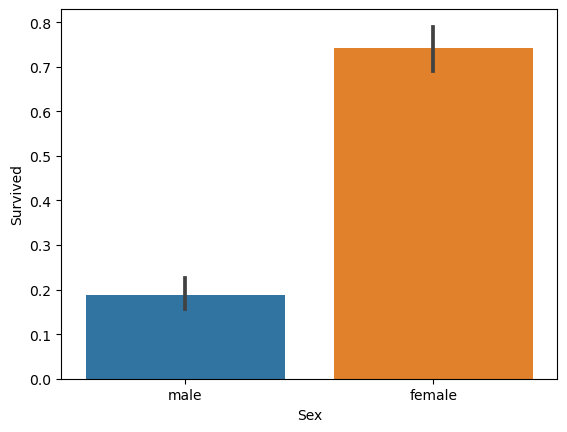

In [17]:
#Draw a bar plot of survival vs sex category 
sns.barplot(x="Sex", y="Survived", data=train)

Females have a much higher chance of survival than males.

# SibSp VS Survival

In [18]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [19]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [20]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

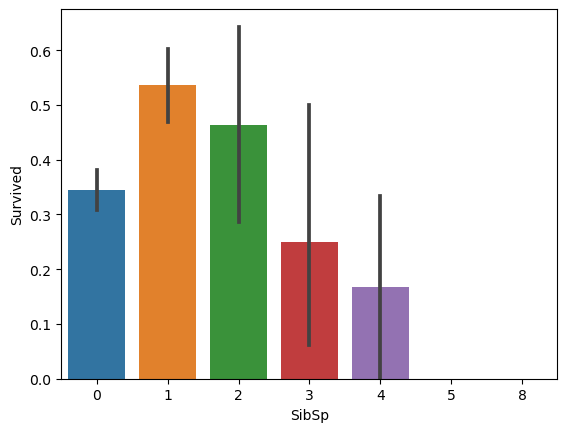

In [21]:
#Draw a bar chart of survival by SibSp category
sns.barplot(x="SibSp",y="Survived",data=train)


In general, it is clear that people with more siblings or spouses were less likely to survive. However,contrary to our expectations, people with no Siblings or spouses were less likely to survive than those with one or two.

# Parch Feature

In [22]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [23]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [24]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

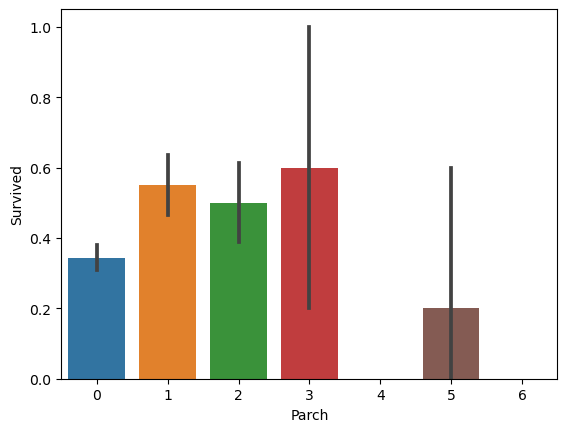

In [25]:
#Draw a bar plot for Parch vs Survival

sns.barplot(x="Parch",y="Survived",data=train)


People with less than 4 parents or children aboard are most likely to survive than those with four or more.
And people travelling alone are less likely to survive than those with 1-3 parents or children

# Age VS Survival


<AxesSubplot:xlabel='Sex', ylabel='Age'>

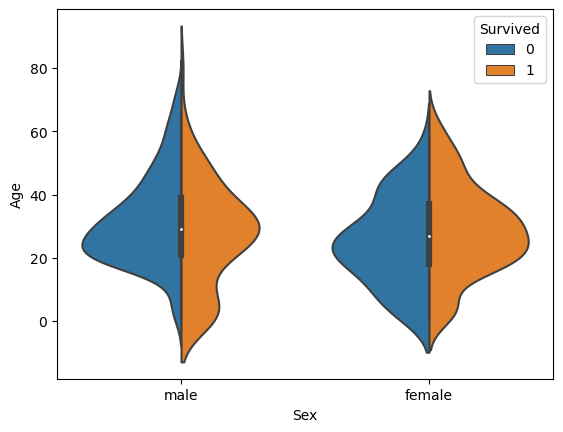

In [26]:
# Violinplot Displays distribution of data across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",
data = train, split = True)

We see that the survival rate is good for children,high for women in the range of 20-50 and less for men as the age increases

# 4) Data Wrangling and Preprocessing

In [27]:
# merge train and test
titanic = train.append(test, ignore_index=True)

# save PassengerId for final submission
passengerId = test.PassengerId

# create indexes to separate data later on
train_idx = len(train)
test_idx = len(titanic) - len(test)

In [28]:
#let's see how the new dataframe looks like:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
## get info on features
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


We begin with creating a title feature which will just contain the honorific terms from the Name feature. Eg. Mr,Mrs etc

In [30]:
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [31]:
#Now we look for the unique titles that were pulled
titanic["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [32]:
# normalize the titles
normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [33]:
# map the normalized titles to the current titles 
titanic.Title = titanic.Title.map(normalized_titles)
# view value counts for the normalized titles
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


Next, We estimate the missing Age values.Since we cannot directly insert mean or median values in age category (because that will just not make sense), we will try to predict these values by taking the help of other features. 

Sex, Title and Pclass features will help us the best to predict the age values.

In [34]:
# group by Sex, Pclass, and Title 
grouped = titanic.groupby(['Sex','Pclass', 'Title'])  
# view the median Age by the grouped features 
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

In [35]:
# apply the grouped median value on the Age NaN
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

Next, we move onto the next features with missing values, Cabin, Embarked, and Fare. For these, we will simply fill Cabin with “U” for unknown, in Embarked we will fill with the most frequent point of embarkment, and since Fare only has 1 missing value we will just fill it in with the median value of the dataset:

In [36]:
# fill Cabin NaN with U for unknown
titanic.Cabin = titanic.Cabin.fillna('U')

# find most frequent Embarked value and store in variable
most_embarked = titanic.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

# fill NaN with median fare
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())



In [37]:
#Now let's check our data once again:

In [38]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


In [39]:
# size of families (including the passenger)
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1

In [40]:
# map first letter of cabin to itself
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

In [41]:
#let us view our data again 
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1


In [42]:
#We will use pd.get_dummies() method from pandas that convertscategorical features into dummy variables.

In [43]:
# Convert the male and female groups to integer form
titanic.Sex = titanic.Sex.map({"male": 0, "female":1})

In [44]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
cabin_dummies = pd.get_dummies(titanic.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")

In [45]:
# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

In [46]:
#Finally we drop the categorical fields

titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [47]:
#let us look at out data again


In [48]:
titanic_dummies.head()
titanic_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Sex            1309 non-null   int64  
 3   Age            1309 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Fare           1309 non-null   float64
 7   FamilySize     1309 non-null   int64  
 8   Pclass_1       1309 non-null   uint8  
 9   Pclass_2       1309 non-null   uint8  
 10  Pclass_3       1309 non-null   uint8  
 11  Title_Master   1309 non-null   uint8  
 12  Title_Miss     1309 non-null   uint8  
 13  Title_Mr       1309 non-null   uint8  
 14  Title_Mrs      1309 non-null   uint8  
 15  Title_Officer  1309 non-null   uint8  
 16  Title_Royalty  1309 non-null   uint8  
 17  Cabin_A        1309 non-null   uint8  
 18  Cabin_B 

In [49]:
# create train and test data
from sklearn.model_selection import train_test_split
train = titanic_dummies[ :train_idx]
test = titanic_dummies[test_idx: ]
print(train.shape,test.shape)

(891, 29) (418, 29)


In [50]:
# convert Survived back to int
train.Survived = train.Survived.astype(int)

In [51]:
#split data into train and test 

In [52]:
labels=train.Survived
selected_train= train.drop('Survived', axis=1).values 
X_train, X_test, y_train, y_test = train_test_split(selected_train, labels, train_size=0.8, test_size=0.2)

In [53]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((712, 28), (712,), (179, 28), (179,))

# 5)Modeling

In [54]:
#importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Logistic Regression

In [55]:
clf = LogisticRegression()
clf.fit(X_train,y_train)




LogisticRegression()

In [56]:
import sklearn 
print (sklearn.__version__) 

1.0.2


In [57]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
matrix=confusion_matrix(y_test, pred_logreg)
print(matrix)
print(classification_report(y_test, pred_logreg))
print(accuracy_score(y_test, pred_logreg))

[[96 21]
 [19 43]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       117
           1       0.67      0.69      0.68        62

    accuracy                           0.78       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

0.776536312849162
